In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Information about the dataset
X_train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

X_test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero

In [53]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Data Definiton

In [54]:
trainSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")
testSet = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")

## Visualization

In [55]:
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [56]:
trainSet.columns,

(Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
        'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
       dtype='object'),)

In [58]:
idx = np.hstack((0,trainSet[trainSet.t ==10].index.values +1))
idx.shape, trainSet.t.min(), trainSet.t.max()

((4054,), np.float64(0.0), np.float64(10.0))

## Plot Representation

1964


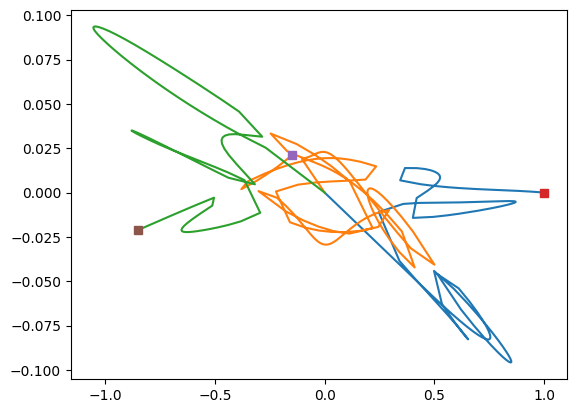

In [86]:
k = np.random.randint(idx.shape[0])
print(k)
pltidx = range(idx[k] , 257+idx[k])
pltsquare = idx[k]
plt.plot(trainSet.x_1[pltidx], trainSet.y_1[pltidx])
plt.plot(trainSet.x_2[pltidx], trainSet.y_2[pltidx])
plt.plot(trainSet.x_3[pltidx], trainSet.y_3[pltidx])

plt.plot(trainSet.x_1[pltsquare], trainSet.y_1[pltsquare], 's')
plt.plot(trainSet.x_2[pltsquare], trainSet.y_2[pltsquare], 's')
plt.plot(trainSet.x_3[pltsquare], trainSet.y_3[pltsquare], 's')

## Data Cleaning

In [60]:
#trajectory id column
trainSet['trajectory_id'] = trainSet['Id'] // 257
trainSet.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0


In [97]:
# Clean rows with 0's in any column
cleanSet = trainSet.loc[(trainSet.drop(columns='trajectory_id') != 0).all(axis=1)]


In [64]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    # Combine features and targets
    data = np.hstack((X, y))
    
    # Set a random seed
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    np.random.shuffle(data)
    
    # Determine the split index based on the test size
    split_idx = int(len(data) * (1 - test_size))
    
    # Split the data back into features and target
    X_train, y_train = data[:split_idx, :-y.shape[1]], data[:split_idx, -y.shape[1]:]
    X_test, y_test = data[split_idx:, :-y.shape[1]], data[split_idx:, -y.shape[1]:]
    
    return X_train, X_test, y_train, y_test

In [98]:
X = cleanSet[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2','v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3']].values
y = cleanSet[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']].values

# Apply the custom train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (867833, 13), X_test shape: (216959, 13)
y_train shape: (867833, 6), y_test shape: (216959, 6)


## Assessing Model Accuracy

In [99]:
def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

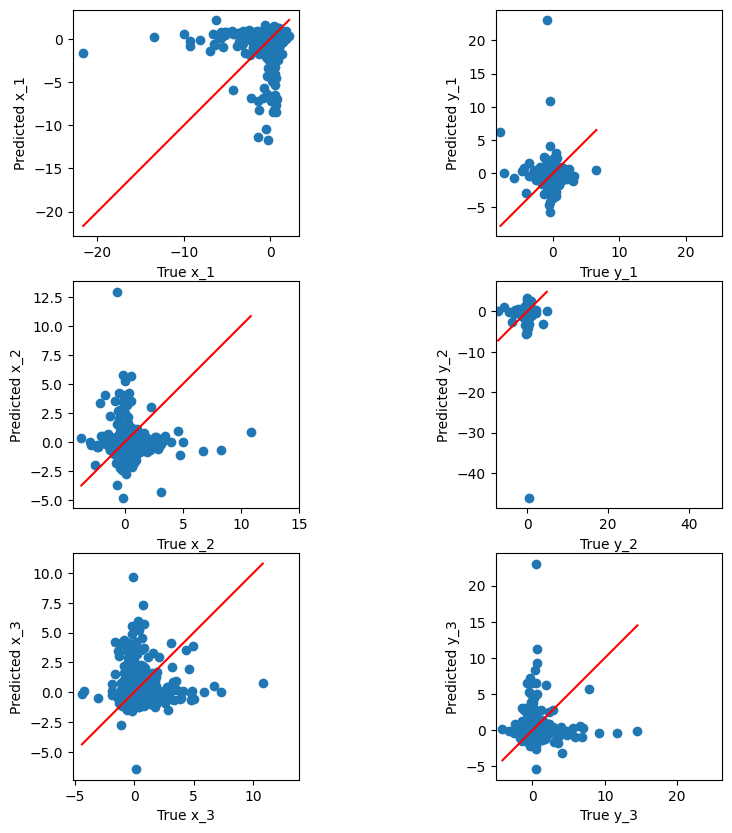

In [101]:
plot_y_yhat(y_test, y_train, "plot")